In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import quandl
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',600)
import seaborn as sns
from tqdm import tqdm
import math

In [22]:
df = pd.read_csv('D:\ITB\Lomba PPM\PPM anteraja\maps_scrape.csv')

In [23]:
lowrate = df.loc[(df['Rating'].str.contains("1 bintang")) | (df['Rating'].str.contains("2 bintang")) | (df['Rating'].str.contains("3 bintang"))]

In [24]:
lowrate["Review"] = lowrate["Review"].str.lower()

In [25]:
df_wc = lowrate.Review.str.split(expand=True).stack().value_counts().rename_axis('kata').reset_index(name='counts')
word_count = lowrate.Review.str.split(expand=True).stack().value_counts()

In [26]:
def count_words(frame, word):
    x = 0
    for index, row in frame.iterrows():
        if(word in row["kata"]):
            x += row["counts"]
    return x

In [27]:
worddict = { 
    "lama"  :    0,
    "lemot" :    0,
    "tepat" :    0,
    "cepat" :    0,
    "cepet" :    0,
    "kapan" :    0,
    "bubar" :    0,
    "bagus" :    0,
    "buruk" :    0,
    "jelek" :    0,
    "baik"  :    0
}

In [28]:
for i in tqdm(range(0,len(worddict))):
    cari = list(worddict.keys())[i]
    worddict[cari] = count_words(df_wc,cari)

100%|██████████| 11/11 [00:15<00:00,  1.41s/it]


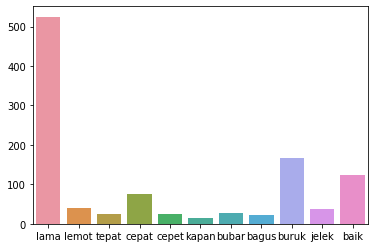

In [29]:
keys = list(worddict.keys())
# get values in the same order as keys, and parse percentage values
vals = [(worddict[k]) for k in keys]
sns.barplot(x=keys, y=vals)

In [30]:
df_kata = pd.DataFrame(list(worddict.items()),columns = ['kata','jumlah']) 

In [42]:
def plot(df):
    sns.barplot(x='kata',
            y="jumlah", data=df, 
            order=df.sort_values('jumlah').kata)

In [37]:
df_kual  = df_kata.iloc[0:6]
df_tepat = df_kata.iloc[6:-1]

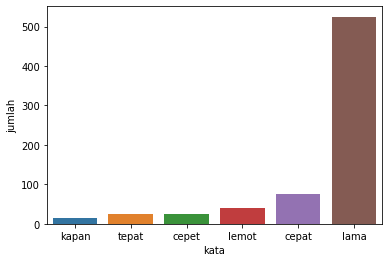

In [43]:
plot(df_kual)

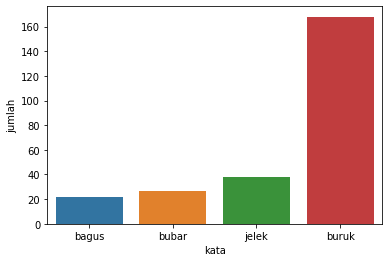

In [44]:
plot(df_tepat)

In [47]:
df_tepat

,kata,jumlah
6,bubar,27
7,bagus,22
8,buruk,168
9,jelek,38


In [46]:
df_kual

,kata,jumlah
0,lama,525
1,lemot,39
2,tepat,24
3,cepat,76
4,cepet,26
5,kapan,15


In [ ]:
df